In [30]:
import numpy as np
import scipy as sp
from astropy.io import fits
import matplotlib
%matplotlib inline
#%matplotlib notebook
import matplotlib.pyplot as plt
import PIL
from PIL import Image
from scipy.ndimage import correlate
import matplotlib.colors as colors
from math import sqrt
from skimage import data
from skimage.feature import blob_dog, blob_log, blob_doh
from skimage.color import rgb2gray
print('Import done')
from matplotlib.colors import LogNorm
from scipy.ndimage import gaussian_filter
from scipy.spatial import Delaunay
from scipy.spatial import cKDTree
from scipy.spatial import KDTree
from scipy.interpolate import griddata
from scipy.optimize import minimize
from scipy.optimize import curve_fit
from scipy.optimize import leastsq
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
print(sns.__version__)

from astropy.table import QTable, Table, Column
from astropy import units as u


#
#
#
from HIIblob import *
import time

#
# Only for plotting
#
def add_colorbar(im, aspect=20, pad_fraction=0.5, **kwargs):
    """Add a vertical color bar to an image plot."""
    divider = axes_grid1.make_axes_locatable(im.axes)
    width = axes_grid1.axes_size.AxesY(im.axes, aspect=1./aspect)
    pad = axes_grid1.axes_size.Fraction(pad_fraction, width)
    current_ax = plt.gca()
    cax = divider.append_axes("right", size=width, pad=pad)
    plt.sca(current_ax)
    return im.axes.figure.colorbar(im, cax=cax, **kwargs)
from mpl_toolkits import axes_grid1


#from resizeimage import resizeimage

Import done
0.10.1


365


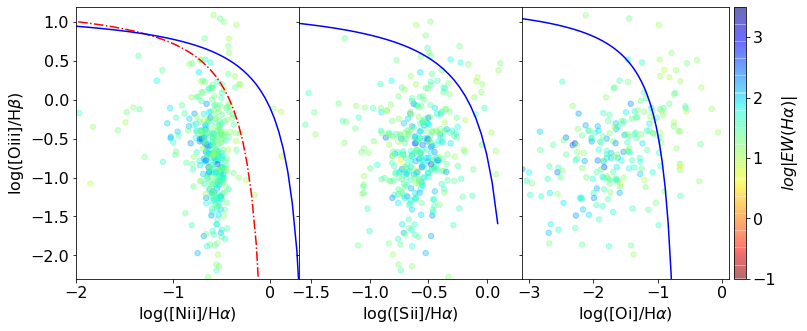

In [41]:
#apex_file="apex_carma_califa_fulltab_acocorr_err_tap_hahb.fits"
name = "NGC6975"
#name = "NGC4030"

file_table_HII = 'MUSE/'+name+'.HII_table.cube.fits.gz'
t_HII = Table.read(file_table_HII, format='fits')
Ha=t_HII['flux_Ha']
Hb=t_HII['flux_Hb']
OIII=t_HII['flux_[OIII]4959']
NII=t_HII['flux_[NII]6584']
SII_1=t_HII['flux_[SII]6717']
SII_2=t_HII['flux_[SII]6731']
SII=SII_1+SII_2
OI=t_HII['flux_[OI]']
EW_Ha=t_HII['EW_Ha']
O3=np.log10(OIII)-np.log10(Hb)
N2=np.log10(NII)-np.log10(Ha)
S2=np.log10(SII/Ha)
O1=np.log10(OI/Ha)
#for Ha_now,NII_now,N2_now in zip(Ha,NII,N2):
#    print('VAL= ',Ha_now,NII_now,N2_now)
#print(NII,Ha)

log_EW_Ha=np.log10(np.abs(EW_Ha))
mask_Ha = Ha>-100

#
#
fig, axes = plt.subplots(1,3,figsize=(12,5), sharey=True, squeeze=False)
x_min1=-2
x_max1=0.3
y_min1=-2.3
y_max1=1.19


x=np.linspace(2*x_min1,2*x_max1,100)
cut_y=-0.7+0.2-3.67*x
cut_y2=-1.7+0.5-3.67*x
cut_y3=0.61/(x-0.05)+1.3
cut_y4=0.61/(x-0.47)+1.19
cut_y_SII=0.61/(x-0.3)+1.3;
cut_y_SII=0.61/(x-0.3)+1.3;
cut_y_SII_AGNs=1.89*(x)+0.76;
cut_y_OI=0.73/((x+0.59))+1.33;#+1.10;
cut_y_OI_AGNs=1.18*(x)+1.30;
cut_y_OIII_AGNs=1.14*(x)+0.36;
l_EW_min=-1
l_EW_max=3.5
cm = plt.cm.get_cmap('jet_r')

#cax1=axes[0,0].scatter(N2,O3, marker='o', color='none', edgecolor='black',s=30, alpha=0.35)
cax1=axes[0,0].scatter(N2[mask_Ha],O3[mask_Ha],c=log_EW_Ha[mask_Ha], marker='o', s=30, alpha=0.35, cmap=cm, vmin=l_EW_min, vmax=l_EW_max)
cax2=axes[0,1].scatter(S2[mask_Ha],O3[mask_Ha],c=log_EW_Ha[mask_Ha], marker='o', s=30, alpha=0.35, cmap=cm, vmin=l_EW_min, vmax=l_EW_max)
cax3=axes[0,2].scatter(O1[mask_Ha],O3[mask_Ha],c=log_EW_Ha[mask_Ha], marker='o', s=30, alpha=0.35, cmap=cm, vmin=l_EW_min, vmax=l_EW_max)

axes[0,0].plot(x[x<0],cut_y3[x<0],'r-.')
axes[0,0].plot(x,cut_y4,'b-')
axes[0,1].plot(x[x<0.1],cut_y_SII[x<0.1],'b-')
axes[0,2].plot(x[x<-0.6],cut_y_OI[x<-0.6],'b-')


plt.rcParams.update({'font.size': 16})
axes[0,0].set_ylabel(r'log([Oiii]/H$\beta$)')
axes[0,0].set_xlabel(r'log([Nii]/H$\alpha$)')
axes[0,1].set_xlabel(r'log([Sii]/H$\alpha$)')
axes[0,2].set_xlabel(r'log([Oi]/H$\alpha$)')
axes[0,0].set_xlim(x_min1,x_max1)
axes[0,1].set_xlim(x_min1+0.4,x_max1)
axes[0,2].set_xlim(x_min1-1.1,x_max1-0.2)
axes[0,0].set_ylim(y_min1,y_max1)

print(len(N2[(OIII>0) & (NII>0) & (Hb>0) & (Ha>0)]))
cb=add_colorbar(cax3)
cb.set_label(r'$log|EW(H\alpha)|$')

mask_t = (OIII>0) & (NII>0) & (Hb>0) & (Ha>0)
N2_mask = N2 [mask_t]
O3_mask = O3 [mask_t]
log_EW_Ha_mask = log_EW_Ha[mask_t]
#for N2_now,O3_now,lEW in zip(N2_mask,O3_mask,log_EW_Ha_mask):
#    print(N2_now,O3_now,lEW)


#print(N2)
plt.subplots_adjust(wspace=0)
